# Project 1:

# "Pakistan Property Price Prediction Using Boosting Algorithms on Cleaned Zameen.com Data."
######

| **Prepared by:** | Rayyan Ahmed. 
|------------------|--------------------------------------------------------------------------------|
| **Date:**        | 9th Nov, 2024.                                                                |


###
## Loading DataSet
###

In [1]:
import pandas as pd

dforg = pd.read_csv('advertising.csv')
dforg

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


###
## Explanation of Dataset:

**Consider first row where:**

| **TV** | **Radio** | **Newspaper** | **Sales**
|--------|-----------|---------------|----------------------------------------------------------------|
| 230.1  |   37.8    |      69.2     | 22.1 |      |

It means that for any product if spend 230.1 on it's TV advertising, 37.8 on it's Radio Advertising, 69.2 on it's Newspaper advertising, so the sales of that products will be 22.1 units.

Suppose a mobile as our product , if spend 230.1 on it's TV advertising, 37.8 on it's Radio Advertising, 69.2 on it's Newspaper advertising, so we can sale 22.1 mobiles.

###

###
## Dataset Info:
###

In [2]:
dforg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


###
## Dataset Description:
###

In [3]:
dforg.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###
## Value Counts
###

In [4]:
a = dforg.columns

for i in a:
    print('-' * 60)
    print(f'\n{dforg[i].value_counts()}\n')
    print(len(dforg[i].value_counts()))

------------------------------------------------------------

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

190
------------------------------------------------------------

Radio
4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: count, Length: 167, dtype: int64

167
------------------------------------------------------------

Newspaper
9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: count, Length: 172, dtype: int64

172
------------------------------------------------------------

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

121


###
## Creating Scatter Plot:
###

######

**Because there are 121 different values in sales column so we cannot use hue for it. Therefore we'll craete another column for hue parameter.**

######

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

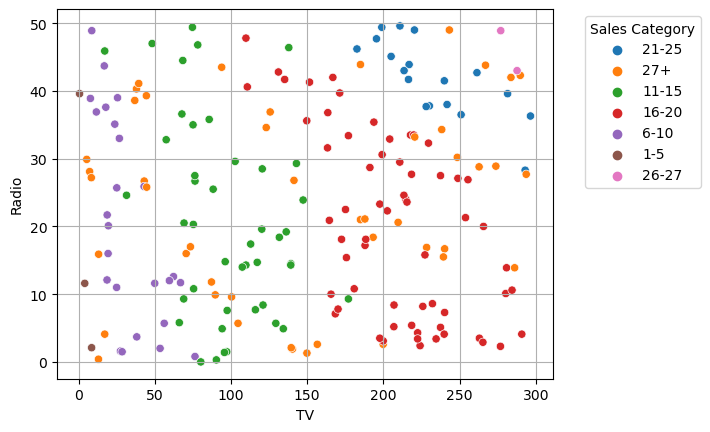

In [6]:
def categorized_value(sales):
    if 1 <= sales <= 5:
        return '1-5'
    elif 6 <= sales <= 10:
        return '6-10'
    elif 11 <= sales <= 15:
        return '11-15'
    elif 16 <= sales <= 20:
        return '16-20'
    elif 21 <= sales <= 25:
        return '21-25'
    elif 26 <= sales <= 27:
        return '26-27'
    else:
        return '27+'
    
dforg['sales_cat'] = dforg['Sales'].apply(categorized_value)

sns.scatterplot(data = dforg, x = 'TV', y = 'Radio', hue = 'sales_cat')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sales Category')

plt.grid()
plt.show()

Hence observing the above plot we saw that TV advertising influence the increasing of sales.

###

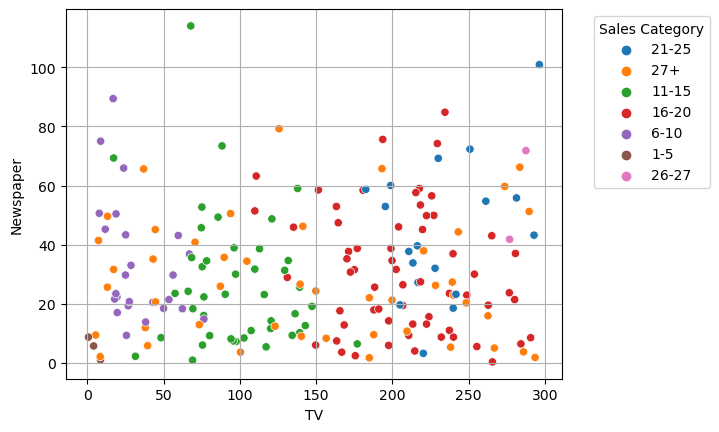

In [7]:
def categorized_value(sales):
    if 1 <= sales <= 5:
        return '1-5'
    elif 6 <= sales <= 10:
        return '6-10'
    elif 11 <= sales <= 15:
        return '11-15'
    elif 16 <= sales <= 20:
        return '16-20'
    elif 21 <= sales <= 25:
        return '21-25'
    elif 26 <= sales <= 27:
        return '26-27'
    else:
        return '27+'
    
dforg['sales_cat'] = dforg['Sales'].apply(categorized_value)

sns.scatterplot(data = dforg, x = 'TV', y = 'Newspaper', hue = 'sales_cat')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sales Category')

plt.grid()
plt.show()

Hence, same like 1st scatter plot, high sales_cat dots are showing on areas where TV Advertising is high, normal sales_cat dots are showing on areas where TV Advertising is normal, low sales_cat dots are showing on areas where TV Advertising is low. 

###

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


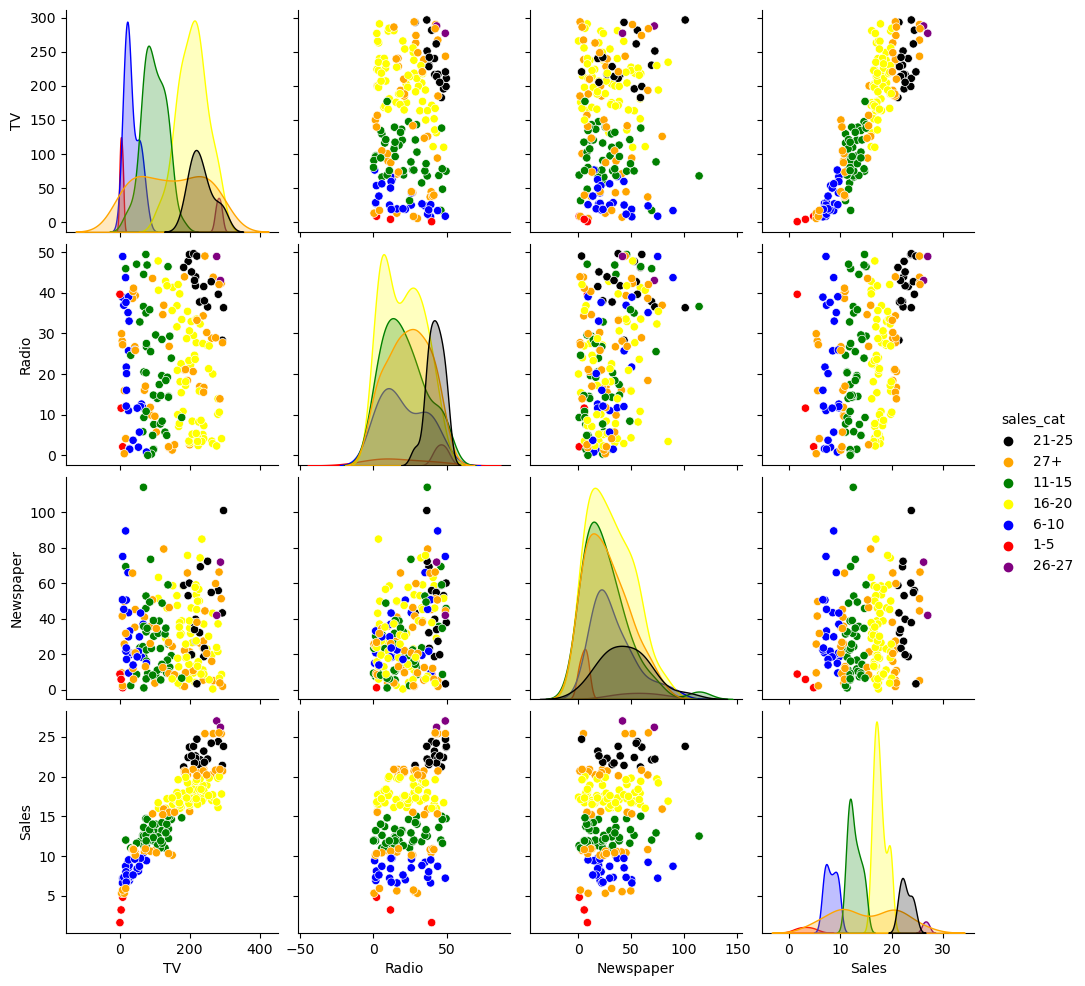

In [8]:
import seaborn as sns

color = {
    '1-5': 'red',
    '6-10': 'blue',
    '11-15': 'green',
    '16-20': 'yellow',
    '21-25': 'black',
    '26-27': 'purple',
    '27+': 'orange'
}
sns.pairplot(dforg, hue = 'sales_cat', palette = color)

###
## Hence by observing the above two scatter plots, we observe that TV Advertising influences Sales the most. Therefore we first make model one all three columns(TV, Radio, Newspaper) and secondly we only include the best column i.e: TV.
###
## Lets start preparing our model.
###

###
## Seperating x and y columns:
###

In [9]:
x = dforg.drop(['Sales', 'sales_cat'], axis = 1)
y = dforg['Sales']

###
## Splitting dataset in training and test data:
###

In [301]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###
## x_train, x_test, y_train, y_test
###

In [49]:
#x_train
#x_test
#y_train
#y_test

###
## Importing AdaBoostRegressor and Fitting Data on It:
###

In [323]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
print(f'Model(AdaBoostRegressor) Accuracy: {r2_score(y_test, ada_pred) * 100:.3f}%')

Model(AdaBoostRegressor) Accuracy: 94.482%


###
## Importing XGBoost:
###

In [218]:
import xgboost as xgb
from sklearn.metrics import r2_score

xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(f'Model(xgboost) Accuracy: {r2_score(y_test, xgb_pred) * 100:.3f}%')

Model(xgboost) Accuracy: 95.303%


###
## Importing CatBoostRegressor:
###

In [527]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
cbr.fit(x_train, y_train)
cbr_pred = cbr.predict(x_test)
print(f'Model(CatBoostRegressor) Accuracy: {r2_score(y_test, cbr_pred) * 100:.3f}%')

Learning rate set to 0.03065
0:	learn: 5.0888327	total: 2.16ms	remaining: 2.16s
1:	learn: 4.9893771	total: 3.9ms	remaining: 1.95s
2:	learn: 4.8964467	total: 5ms	remaining: 1.66s
3:	learn: 4.8092438	total: 6.12ms	remaining: 1.52s
4:	learn: 4.7210745	total: 7.21ms	remaining: 1.44s
5:	learn: 4.6255071	total: 8.2ms	remaining: 1.36s
6:	learn: 4.5431192	total: 9.28ms	remaining: 1.32s
7:	learn: 4.4611890	total: 10.2ms	remaining: 1.26s
8:	learn: 4.3855029	total: 11.1ms	remaining: 1.22s
9:	learn: 4.3093483	total: 12ms	remaining: 1.19s
10:	learn: 4.2350512	total: 13ms	remaining: 1.16s
11:	learn: 4.1544282	total: 14ms	remaining: 1.15s
12:	learn: 4.0796038	total: 14.9ms	remaining: 1.13s
13:	learn: 4.0118719	total: 16.2ms	remaining: 1.14s
14:	learn: 3.9349851	total: 17.5ms	remaining: 1.15s
15:	learn: 3.8704039	total: 18.7ms	remaining: 1.15s
16:	learn: 3.8019953	total: 19.8ms	remaining: 1.14s
17:	learn: 3.7349304	total: 20.8ms	remaining: 1.14s
18:	learn: 3.6687222	total: 21.9ms	remaining: 1.13s
19:	

191:	learn: 0.9032648	total: 186ms	remaining: 784ms
192:	learn: 0.9005777	total: 188ms	remaining: 785ms
193:	learn: 0.8977834	total: 189ms	remaining: 785ms
194:	learn: 0.8958397	total: 190ms	remaining: 784ms
195:	learn: 0.8927923	total: 191ms	remaining: 784ms
196:	learn: 0.8903898	total: 192ms	remaining: 783ms
197:	learn: 0.8877190	total: 193ms	remaining: 783ms
198:	learn: 0.8844022	total: 194ms	remaining: 783ms
199:	learn: 0.8820269	total: 195ms	remaining: 782ms
200:	learn: 0.8766798	total: 197ms	remaining: 782ms
201:	learn: 0.8728818	total: 198ms	remaining: 782ms
202:	learn: 0.8720097	total: 199ms	remaining: 781ms
203:	learn: 0.8699296	total: 200ms	remaining: 780ms
204:	learn: 0.8674064	total: 201ms	remaining: 780ms
205:	learn: 0.8661024	total: 202ms	remaining: 780ms
206:	learn: 0.8633408	total: 204ms	remaining: 780ms
207:	learn: 0.8613891	total: 205ms	remaining: 779ms
208:	learn: 0.8586785	total: 206ms	remaining: 778ms
209:	learn: 0.8571198	total: 207ms	remaining: 779ms
210:	learn: 

383:	learn: 0.6026241	total: 367ms	remaining: 589ms
384:	learn: 0.6014153	total: 369ms	remaining: 589ms
385:	learn: 0.5991430	total: 370ms	remaining: 589ms
386:	learn: 0.5990175	total: 371ms	remaining: 588ms
387:	learn: 0.5983090	total: 372ms	remaining: 587ms
388:	learn: 0.5966058	total: 373ms	remaining: 586ms
389:	learn: 0.5954800	total: 374ms	remaining: 585ms
390:	learn: 0.5941814	total: 375ms	remaining: 585ms
391:	learn: 0.5938180	total: 376ms	remaining: 584ms
392:	learn: 0.5916569	total: 378ms	remaining: 584ms
393:	learn: 0.5914054	total: 379ms	remaining: 583ms
394:	learn: 0.5912759	total: 380ms	remaining: 582ms
395:	learn: 0.5904815	total: 381ms	remaining: 581ms
396:	learn: 0.5871321	total: 382ms	remaining: 580ms
397:	learn: 0.5868085	total: 383ms	remaining: 579ms
398:	learn: 0.5852723	total: 385ms	remaining: 579ms
399:	learn: 0.5839568	total: 386ms	remaining: 579ms
400:	learn: 0.5836766	total: 387ms	remaining: 578ms
401:	learn: 0.5831451	total: 388ms	remaining: 577ms
402:	learn: 

564:	learn: 0.4235653	total: 549ms	remaining: 423ms
565:	learn: 0.4227710	total: 551ms	remaining: 422ms
566:	learn: 0.4223587	total: 552ms	remaining: 422ms
567:	learn: 0.4214919	total: 553ms	remaining: 421ms
568:	learn: 0.4191763	total: 554ms	remaining: 420ms
569:	learn: 0.4188472	total: 555ms	remaining: 419ms
570:	learn: 0.4178770	total: 556ms	remaining: 418ms
571:	learn: 0.4175763	total: 557ms	remaining: 417ms
572:	learn: 0.4172121	total: 558ms	remaining: 416ms
573:	learn: 0.4160401	total: 560ms	remaining: 415ms
574:	learn: 0.4156034	total: 561ms	remaining: 414ms
575:	learn: 0.4147475	total: 562ms	remaining: 414ms
576:	learn: 0.4133935	total: 563ms	remaining: 413ms
577:	learn: 0.4120876	total: 564ms	remaining: 412ms
578:	learn: 0.4113698	total: 565ms	remaining: 411ms
579:	learn: 0.4101753	total: 566ms	remaining: 410ms
580:	learn: 0.4100472	total: 567ms	remaining: 409ms
581:	learn: 0.4093626	total: 568ms	remaining: 408ms
582:	learn: 0.4090243	total: 569ms	remaining: 407ms
583:	learn: 

741:	learn: 0.3080368	total: 727ms	remaining: 253ms
742:	learn: 0.3066391	total: 728ms	remaining: 252ms
743:	learn: 0.3063384	total: 729ms	remaining: 251ms
744:	learn: 0.3061736	total: 730ms	remaining: 250ms
745:	learn: 0.3058922	total: 731ms	remaining: 249ms
746:	learn: 0.3055429	total: 732ms	remaining: 248ms
747:	learn: 0.3043446	total: 733ms	remaining: 247ms
748:	learn: 0.3037236	total: 735ms	remaining: 246ms
749:	learn: 0.3031171	total: 736ms	remaining: 245ms
750:	learn: 0.3027673	total: 737ms	remaining: 244ms
751:	learn: 0.3026460	total: 738ms	remaining: 243ms
752:	learn: 0.3024122	total: 739ms	remaining: 242ms
753:	learn: 0.3018374	total: 741ms	remaining: 242ms
754:	learn: 0.3016485	total: 742ms	remaining: 241ms
755:	learn: 0.3007282	total: 743ms	remaining: 240ms
756:	learn: 0.3003774	total: 744ms	remaining: 239ms
757:	learn: 0.2995215	total: 745ms	remaining: 238ms
758:	learn: 0.2983194	total: 746ms	remaining: 237ms
759:	learn: 0.2977353	total: 747ms	remaining: 236ms
760:	learn: 

914:	learn: 0.2319067	total: 904ms	remaining: 84ms
915:	learn: 0.2315205	total: 906ms	remaining: 83.1ms
916:	learn: 0.2307027	total: 907ms	remaining: 82.1ms
917:	learn: 0.2304938	total: 908ms	remaining: 81.1ms
918:	learn: 0.2302417	total: 909ms	remaining: 80.1ms
919:	learn: 0.2298507	total: 910ms	remaining: 79.2ms
920:	learn: 0.2292445	total: 912ms	remaining: 78.2ms
921:	learn: 0.2290357	total: 913ms	remaining: 77.2ms
922:	learn: 0.2287915	total: 913ms	remaining: 76.2ms
923:	learn: 0.2286680	total: 914ms	remaining: 75.2ms
924:	learn: 0.2282365	total: 915ms	remaining: 74.2ms
925:	learn: 0.2281277	total: 917ms	remaining: 73.3ms
926:	learn: 0.2279459	total: 918ms	remaining: 72.3ms
927:	learn: 0.2276968	total: 919ms	remaining: 71.3ms
928:	learn: 0.2274837	total: 920ms	remaining: 70.3ms
929:	learn: 0.2272023	total: 921ms	remaining: 69.3ms
930:	learn: 0.2269519	total: 922ms	remaining: 68.3ms
931:	learn: 0.2267363	total: 923ms	remaining: 67.4ms
932:	learn: 0.2265299	total: 925ms	remaining: 66

###
## Applying Hyperparameters and Tuning the Models.
###

###
## AdaBoostRegressor:
###

In [295]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 42)

ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
print(f'Model(AdaBoostRegressor) Accuracy: {r2_score(y_test, ada_pred) * 100:.3f}%')

Model(AdaBoostRegressor) Accuracy: 98.363%


####
#### On test_size = 0.01, accuracy is 98.363%. But it may be misleading as test_size doesn't cover more sample to test data. Hence we will increase test_size and apply parameters.
####

In [345]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

adapar = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 15), n_estimators = 50)
adapar.fit(x_train, y_train)
adapar_pred = adapar.predict(x_test)

adapar_accuracy = r2_score(y_test, adapar_pred) * 100
prevacc = 94.482
inc = adapar_accuracy - prevacc

print(f'Previous AdaBoostRegressor Accuracy: {prevacc}%')
print(f'Model(AdaBoostRegressor) Accuracy: {adapar_accuracy:.3f}%')
print(f'Accuracy increased: {inc:.3f}%')

Previous AdaBoostRegressor Accuracy: 94.482%
Model(AdaBoostRegressor) Accuracy: 95.821%
Accuracy increased: 1.339%


###
## XGBRegressor:
###

In [478]:
import xgboost as xgb
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

abc = xgb.XGBRegressor(n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state = 0)
abc.fit(x_train, y_train)
abc_pred = abc.predict(x_test)

abc_accuracy = r2_score(y_test, abc_pred) * 100
prevacc = 94.303
inc = abc_accuracy - prevacc

print(f'Previous xgb.XGBRegressor Accuracy: {prevacc}%')
print(f'Current xgb.XGbRegressor Accuracy: {abc_accuracy:.3f}%')
print(f'Accuracy increased: {inc:.3f}%')

Previous xgb.XGBRegressor Accuracy: 94.303%
Current xgb.XGbRegressor Accuracy: 97.585%
Accuracy increased: 3.282%


###
## Importing CatBoost Regressor:
###

In [545]:
from catboost import CatBoostRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

cbrpar = CatBoostRegressor(random_seed = 42)
cbrpar.fit(x_train, y_train)
cbrpar_pred = cbrpar.predict(x_test)

cbr_accuracy = r2_score(y_test, cbrpar_pred) * 100
prevacc = 94.303
inc = cbr_accuracy - prevacc

print(f'Previous CatBoostRegressor Accuracy: {prevacc}%')
print(f'Current CatBoostRegressor Accuracy: {cbr_accuracy:.3f}%')
print(f'Accuracy increased: {inc:.3f}%')

Learning rate set to 0.03065
0:	learn: 5.1347125	total: 1.77ms	remaining: 1.76s
1:	learn: 5.0346796	total: 5.53ms	remaining: 2.76s
2:	learn: 4.9392726	total: 7.7ms	remaining: 2.56s
3:	learn: 4.8522890	total: 9.05ms	remaining: 2.25s
4:	learn: 4.7775525	total: 10.9ms	remaining: 2.16s
5:	learn: 4.6821501	total: 11.9ms	remaining: 1.97s
6:	learn: 4.5976802	total: 12.9ms	remaining: 1.83s
7:	learn: 4.5135850	total: 13.9ms	remaining: 1.73s
8:	learn: 4.4268206	total: 15ms	remaining: 1.65s
9:	learn: 4.3561792	total: 16ms	remaining: 1.59s
10:	learn: 4.2785142	total: 17.6ms	remaining: 1.59s
11:	learn: 4.1994339	total: 18.8ms	remaining: 1.54s
12:	learn: 4.1282979	total: 19.8ms	remaining: 1.5s
13:	learn: 4.0524401	total: 20.7ms	remaining: 1.46s
14:	learn: 3.9720790	total: 21.7ms	remaining: 1.42s
15:	learn: 3.8912362	total: 22.6ms	remaining: 1.39s
16:	learn: 3.8182933	total: 23.6ms	remaining: 1.36s
17:	learn: 3.7500324	total: 24.8ms	remaining: 1.35s
18:	learn: 3.6804932	total: 26ms	remaining: 1.34s
1

167:	learn: 0.9468306	total: 172ms	remaining: 852ms
168:	learn: 0.9442911	total: 174ms	remaining: 855ms
169:	learn: 0.9379746	total: 175ms	remaining: 855ms
170:	learn: 0.9350640	total: 176ms	remaining: 854ms
171:	learn: 0.9325516	total: 177ms	remaining: 853ms
172:	learn: 0.9296372	total: 178ms	remaining: 853ms
173:	learn: 0.9276383	total: 179ms	remaining: 852ms
174:	learn: 0.9249975	total: 181ms	remaining: 852ms
175:	learn: 0.9217458	total: 182ms	remaining: 851ms
176:	learn: 0.9193719	total: 183ms	remaining: 850ms
177:	learn: 0.9163492	total: 184ms	remaining: 850ms
178:	learn: 0.9142191	total: 185ms	remaining: 849ms
179:	learn: 0.9108321	total: 186ms	remaining: 848ms
180:	learn: 0.9084151	total: 187ms	remaining: 848ms
181:	learn: 0.9064103	total: 189ms	remaining: 848ms
182:	learn: 0.9038885	total: 190ms	remaining: 846ms
183:	learn: 0.9011859	total: 191ms	remaining: 847ms
184:	learn: 0.8991529	total: 192ms	remaining: 846ms
185:	learn: 0.8969381	total: 194ms	remaining: 847ms
186:	learn: 

359:	learn: 0.5955392	total: 355ms	remaining: 631ms
360:	learn: 0.5939584	total: 357ms	remaining: 632ms
361:	learn: 0.5933603	total: 358ms	remaining: 632ms
362:	learn: 0.5931199	total: 359ms	remaining: 630ms
363:	learn: 0.5916686	total: 360ms	remaining: 629ms
364:	learn: 0.5900308	total: 361ms	remaining: 628ms
365:	learn: 0.5888872	total: 362ms	remaining: 628ms
366:	learn: 0.5851276	total: 364ms	remaining: 627ms
367:	learn: 0.5848871	total: 365ms	remaining: 626ms
368:	learn: 0.5831283	total: 366ms	remaining: 626ms
369:	learn: 0.5810496	total: 367ms	remaining: 625ms
370:	learn: 0.5780581	total: 368ms	remaining: 624ms
371:	learn: 0.5764400	total: 369ms	remaining: 623ms
372:	learn: 0.5760021	total: 370ms	remaining: 623ms
373:	learn: 0.5757156	total: 372ms	remaining: 623ms
374:	learn: 0.5754938	total: 373ms	remaining: 622ms
375:	learn: 0.5753049	total: 374ms	remaining: 621ms
376:	learn: 0.5749368	total: 375ms	remaining: 620ms
377:	learn: 0.5712779	total: 376ms	remaining: 619ms
378:	learn: 

535:	learn: 0.4170231	total: 533ms	remaining: 462ms
536:	learn: 0.4164350	total: 535ms	remaining: 461ms
537:	learn: 0.4162422	total: 536ms	remaining: 460ms
538:	learn: 0.4154270	total: 537ms	remaining: 460ms
539:	learn: 0.4153425	total: 539ms	remaining: 459ms
540:	learn: 0.4145869	total: 540ms	remaining: 458ms
541:	learn: 0.4123447	total: 541ms	remaining: 457ms
542:	learn: 0.4113779	total: 542ms	remaining: 456ms
543:	learn: 0.4112855	total: 543ms	remaining: 455ms
544:	learn: 0.4104177	total: 544ms	remaining: 454ms
545:	learn: 0.4098832	total: 545ms	remaining: 453ms
546:	learn: 0.4082327	total: 546ms	remaining: 452ms
547:	learn: 0.4065618	total: 548ms	remaining: 452ms
548:	learn: 0.4059782	total: 549ms	remaining: 451ms
549:	learn: 0.4045986	total: 550ms	remaining: 450ms
550:	learn: 0.4039626	total: 551ms	remaining: 449ms
551:	learn: 0.4038879	total: 553ms	remaining: 449ms
552:	learn: 0.4037723	total: 555ms	remaining: 448ms
553:	learn: 0.4027001	total: 556ms	remaining: 447ms
554:	learn: 

862:	learn: 0.2346424	total: 889ms	remaining: 141ms
863:	learn: 0.2341779	total: 891ms	remaining: 140ms
864:	learn: 0.2339930	total: 892ms	remaining: 139ms
865:	learn: 0.2336186	total: 893ms	remaining: 138ms
866:	learn: 0.2332335	total: 894ms	remaining: 137ms
867:	learn: 0.2326510	total: 896ms	remaining: 136ms
868:	learn: 0.2320841	total: 897ms	remaining: 135ms
869:	learn: 0.2315120	total: 899ms	remaining: 134ms
870:	learn: 0.2314379	total: 900ms	remaining: 133ms
871:	learn: 0.2310580	total: 902ms	remaining: 132ms
872:	learn: 0.2305256	total: 903ms	remaining: 131ms
873:	learn: 0.2300602	total: 904ms	remaining: 130ms
874:	learn: 0.2299884	total: 905ms	remaining: 129ms
875:	learn: 0.2293288	total: 906ms	remaining: 128ms
876:	learn: 0.2290913	total: 907ms	remaining: 127ms
877:	learn: 0.2286102	total: 909ms	remaining: 126ms
878:	learn: 0.2282742	total: 909ms	remaining: 125ms
879:	learn: 0.2282096	total: 911ms	remaining: 124ms
880:	learn: 0.2276798	total: 912ms	remaining: 123ms
881:	learn: 